# Boston Housing Exercise - Polynomial Regression

**Please import the Boston housing dataset, do some EDA, and clean data. Then calculate linear regression. After that please use Polynomial Regression. Calculate RMSE and R squared for each. Please use sklearn to implement Linear Regression**

In [1]:
# http://lib.stat.cmu.edu/datasets/boston

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [3]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX'
           , 'RM', 'AGE', 'DIS', 'RAD', 'TAX'
           , 'PTRATIO', 'B', 'LSTAT', 'MEDV']
columns = [col.lower() for col in columns]

df = pd.read_csv('http://lib.stat.cmu.edu/datasets/boston'
                 , delim_whitespace=True, skiprows=21
                 , names=columns[:11]
                  )

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [5]:
df1 = df.iloc[::2, :].reset_index(drop=True)
df2 = df.iloc[1::2,0:3].reset_index(drop=True)

df2.columns = columns[11:]
print(df1.shape)
df1.head()

(506, 11)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [6]:
df2.head()

,b,lstat,medv
0,396.90,4.98,24.0
1,396.90,9.14,21.6
2,392.83,4.03,34.7
3,394.63,2.94,33.4
4,396.90,5.33,36.2


 + CRIM     per capita crime rate by town
 + ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 + INDUS    proportion of non-retail business acres per town
 + CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 + NOX      nitric oxides concentration (parts per 10 million)
 + RM       average number of rooms per dwelling
 + AGE      proportion of owner-occupied units built prior to 1940
 + DIS      weighted distances to five Boston employment centres
 + RAD      index of accessibility to radial highways
 + TAX      full-value property-tax rate per $10,000
 + PTRATIO  pupil-teacher ratio by town
 + B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 + LSTAT    \% lower status of the population
 + MEDV     Median value of owner-occupied homes in \$1000's

In [7]:
df = df1.join(df2)

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1878ea58>,
      dtype=object)

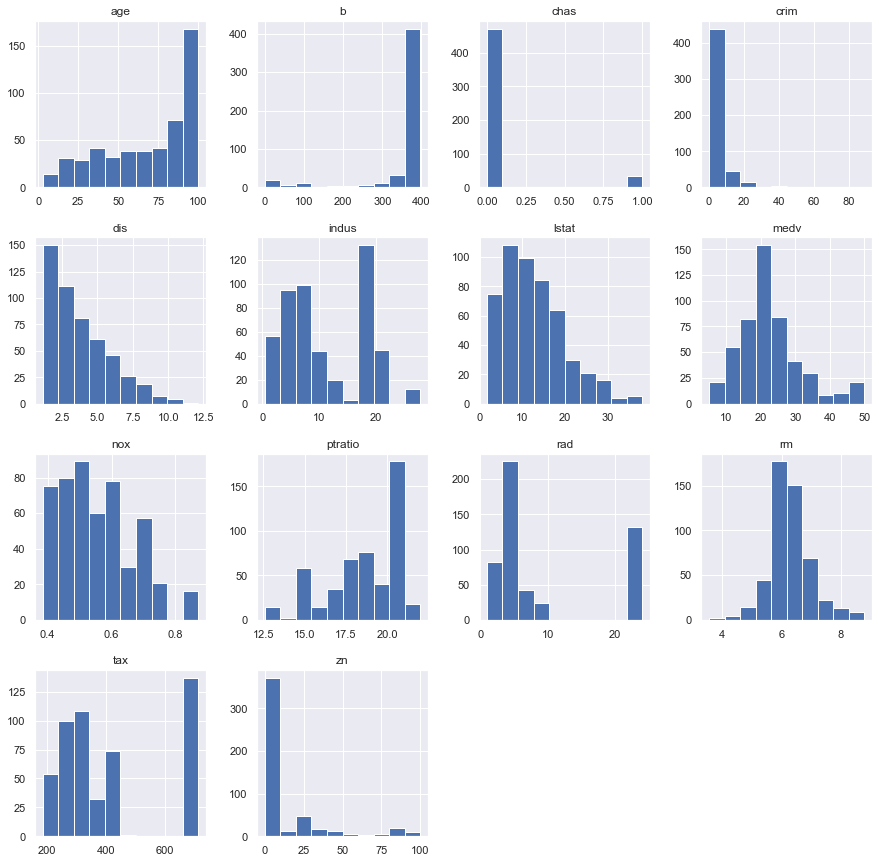

In [10]:
df.hist(figsize=(15,15))

(0, 14)

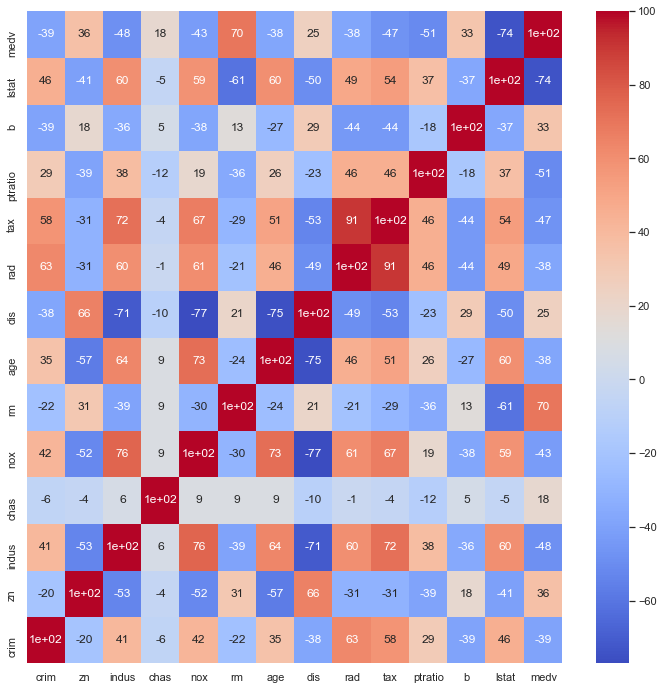

In [11]:
corr_map = df.corr()

f, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(round(corr_map*100,0)
                 , annot=True
                 , cmap='coolwarm')

ax.set_ylim((0, 14))

In [12]:
df.drop(columns=['chas', 'rm', 'ptratio'], axis=0, inplace=True)

In [13]:
#sns.pairplot(data=df)

for col in df.columns:
    qu = df[col].quantile(0.95)
    ql = df[col].quantile(0.05)
    df[col] = df[(df[col] < qu) & (df[col] > ql)]

In [14]:
df.shape

(506, 11)

In [15]:
from sklearn.feature_selection import f_regression

target = ['nox']
pred = [col for col in df.columns if not col in target]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
crim     506 non-null float64
zn       506 non-null float64
indus    506 non-null float64
nox      506 non-null float64
age      506 non-null float64
dis      506 non-null float64
rad      506 non-null float64
tax      506 non-null float64
b        506 non-null float64
lstat    506 non-null float64
medv     506 non-null float64
dtypes: float64(11)
memory usage: 43.6 KB


In [17]:
p_values = f_regression(df[pred], df[target])[1]
p_values.round(3)

/Users/bendixhass/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df[pred], df[target], test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_hat = lin_reg.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test,y_hat))
rmse

0.06920606803567128

In [22]:
r2 = r2_score(y_test,y_hat)
r2

0.658333669252585

(0.3, 0.9)

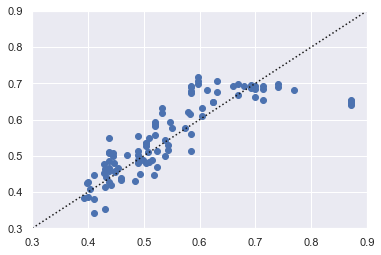

In [23]:
plt.scatter(y_test,y_hat)
plt.plot([0, 1], [0, 1], ':k')
plt.xlim(0.3, 0.9)
plt.ylim(0.3, 0.9)

In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.asanyarray(y_true)
    y_pred = np.asanyarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MSE: 0.0033505731581231516 
RMSE: 0.057884135634240504 
R2: 0.8980881817425881 
MAPE: 7.259201597199075


(0.3, 0.9)

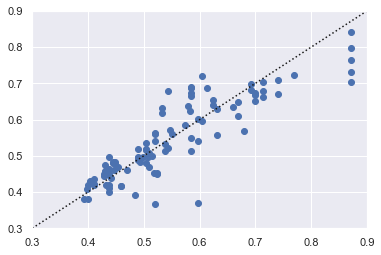

In [25]:
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_hat = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
rmse = np.sqrt(mse)
r2 = r2_score(y_train, poly_reg.predict(X_train_poly))
mape = mean_absolute_percentage_error(y_test, poly_reg.predict(X_test_poly))
print('MSE:', mse, '\nRMSE:', rmse, '\nR2:', r2, '\nMAPE:', mape)

plt.scatter(y_test,y_hat)
plt.plot([0, 1], [0, 1], ':k')
plt.xlim(0.3, 0.9)
plt.ylim(0.3, 0.9)

# without scaler:
# MSE: 0.0034801908744919387 
# RMSE: 0.05899314260566171 
# R2: 0.836901798022428 
# MAPE: 8.106498083260897

# with scaler:
# MSE: 0.0033505731581232 
# RMSE: 0.05788413563424093 
# R2: 0.8980881817425881 
# MAPE: 7.259201597199036

MSE: 0.0029043015634463054 
RMSE: 0.05389157228589926 
R2: 0.8736823128037048 
MAPE: 6.955030404352172


(0.3, 0.9)

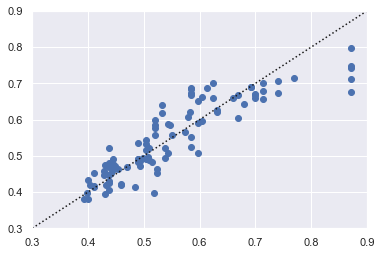

In [26]:
from sklearn.linear_model import Ridge

polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

poly_reg = Ridge(alpha=5)
poly_reg.fit(X_train_poly, y_train)

y_hat = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
rmse = np.sqrt(mse)
r2 = r2_score(y_train, poly_reg.predict(X_train_poly))
mape = mean_absolute_percentage_error(y_test, poly_reg.predict(X_test_poly))
print('MSE:', mse, '\nRMSE:', rmse, '\nR2:', r2, '\nMAPE:', mape)

plt.scatter(y_test,y_hat)
plt.plot([0, 1], [0, 1], ':k')
plt.xlim(0.3, 0.9)
plt.ylim(0.3, 0.9)

# without scaler:
# MSE:  0.0029163497775143927 
# RMSE: 0.05400323858357379 
# R2:   0.8967948573840524 
# MAPE: 6.819881784817276

# with scaler:
# MSE:  0.002906133816375172 
# RMSE: 0.05390856904403206 
# R2:   0.8731456667907969 
# MAPE: 6.953502636067986

In [27]:
poly_reg.coef_

array([[ 0.        ,  0.04064172, -0.00609435,  0.03159943,  0.02611187,
        -0.06635932,  0.01037441, -0.01373661, -0.00021811,  0.00013847,
        -0.01667995,  0.00166067, -0.0120808 ,  0.01564052, -0.01765647,
         0.00770853, -0.04206743, -0.01448671,  0.00152372,  0.00771498,
        -0.01675849,  0.00164495, -0.01549794,  0.01091068, -0.01328928,
        -0.01466516,  0.01322516,  0.00368368,  0.00441455,  0.00381386,
        -0.02504061,  0.00973064, -0.02926054,  0.01877425,  0.01353739,
        -0.01159984,  0.0016787 , -0.01484424,  0.0006904 , -0.00383178,
        -0.00034536,  0.00925618, -0.00885327,  0.00456361,  0.00699611,
         0.01667989,  0.01885396,  0.0018513 , -0.00695095, -0.00803444,
        -0.00865787, -0.00521032,  0.01240688,  0.01212263, -0.01683205,
        -0.01773142, -0.01430039,  0.00586517, -0.0014258 ,  0.01249264,
        -0.00067578, -0.00025876,  0.01723172,  0.00055901,  0.01365866,
         0.00330103]])

MSE: 0.005021140495825839 
RMSE: 0.07086000632109653 
R2: 0.7608231225872936 
MAPE: 22.013947585722974


(0.3, 0.9)

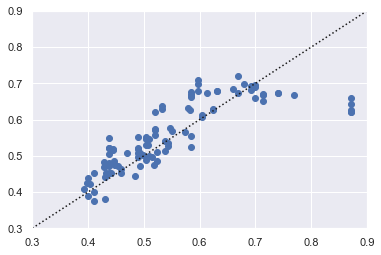

In [28]:
polynomial_features = PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

poly_reg = Lasso(alpha=1e-2, max_iter=20000)
poly_reg.fit(X_train_poly, y_train)

y_hat = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, poly_reg.predict(X_test_poly))
rmse = np.sqrt(mse)
r2 = r2_score(y_train, poly_reg.predict(X_train_poly))
mape = mean_absolute_percentage_error(y_test, y_hat)
print('MSE:', mse, '\nRMSE:', rmse, '\nR2:', r2, '\nMAPE:', mape)

plt.scatter(y_test,y_hat)
plt.plot([0, 1], [0, 1], ':k')
plt.xlim(0.3, 0.9)
plt.ylim(0.3, 0.9)

# without scaler:
# MSE:  0.00376212372099661 
# RMSE: 0.06133615345778222 
# R2:   0.8079890428920641